# Outliers

Outliers in data science are seen as **few data instances** in **features/columns** that **Extreme** to the distribution of the field

We call them **EXTREME Values** either extremly high or low. Example is having a feature as age of participants in this cohort and while gathering the data, we have ages like 10 months old, 2800 months old and its likes. one can detect that 10 months is less than a year, which doesn't make sense on a normal day an age to even know what DS means. same with 2800 months which is over a 200 years old, do people even live that long again?.

So these values are extreme values and we tag them as **OUTLIERS**

In this class, I will broadly group outliers into two main groups.
- **Outliers due to error** : These are outliers that occurs while gathering data, might be human errors, computing error,or due to planned attrocities and so on. for instance, a sales rep enter  3000000 for a dress instead of  300.
- **Interesting Outliers** : These types of outliers are real instances of the feature, for example a feature of salary earned by university employees, we might have from the range of ten of thousands till hundreds of thousands for casual workers and lecturers, then we have millions for the VC, you know millions will be somehow extreme, but it is still a necessary part of the data. 

## Ways for detecting Outliers.

We should note that it is only **numerical data** that do have outliers since It is the ordered and quantified type. So the ways we will be using here will be ways to explore numerical data. 

Considering ways of detecting Outliers, Lets discuss two types of outliers:
- **Univariate Outliers** : These are outliers in a field/feature of a population sample, example is Lagos state having a temperature of -25 degree celcius,
  Some of the basic ways we can use to detect the outliers are :
   - Detecton by mere viewing the data
   - Use of boxplot
   - Use of pandas describe method
   - Use of Tukey’s box plot method.
 
- **Multivariate Outliers (Bi-variate)** : These outliers are anomalies gotten from the relationship between two fields/features, for instance, An employee the receives 80000 naira monthly purchasing an apartment that worths 200000 dollars, we can detect multivariate outliers using **Scatterplots** then getting the distance of the data points
  
Other ways we can use are through the Z-score, IQR and so on. 

### Lets practice!

In [1]:
##Lets import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#By viewing the data
data = [12,14,10,16,15,15,17,12,12,132,18,21,21,18,152,13,11,15,12,12,14]
framed_data = pd.DataFrame(data, columns=['feature'])
framed_data

,feature
0,12
1,14
2,10
3,16
4,15
5,15
6,17
7,12
8,12
9,132


From the feature, we can see the extreme values as 132 and 152, this is considered a crude way of detecting outliers because I gets more difficult to practice the bigger the data gets.

### Use of Pandas describe method

Basic knowledge of statistics has made us deduce methods for measuring the central tendency of data which are :
- Mean.
- Median. 
- Mode.

Mean been a measure of central tendency is highly affected by outliers due to the way it is been calculated.
Median on the otherhand is immune to outliers since it is calculated based on percentile.

So in other to detect if a feature is having outliers, we try to compare the mean and median value because for a normaly distributed data, they are suppose to be the same value or really close values.

In [3]:
##Use of describe pandas method
framed_data.describe()

,feature
count,21.000000
mean,26.761905
std,38.561515
min,10.000000
25%,12.000000
50%,15.000000
75%,18.000000
max,152.000000


The **Mean value of this feature is 26.761** while **Median (50%) is 15.00** proves the presence of outliers in the feature

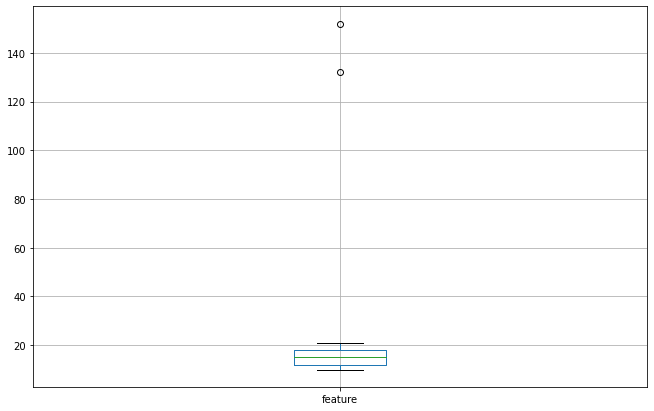

In [4]:
%matplotlib inline
framed_data.boxplot(figsize = (11, 7))
plt.show()

The  median value from the boxplot is around 15 while the whisker shows max tend at around 21, and Min tend around 10 then the 25 and 75 percentiles which are the edges of  the box around 12 and 18 respectively.

We can deduce from the plot, two extreme values represented with small circles one around 130 and the other around 150. this plot clearly shows the outlier in out feature.

**The Use of Tukeys Box Plot method** : This is the method we use to get the index of outliers with the use of fences after the box whiskers, we have the **Inner fence** as a boundary for **Possible Outliers** both upper and lower and **Outter fence** for **Probable Outliers** both upper and lower region. Outter fence are more extreme than inner fence which makes it more likely to be an outlier than the latter.

To calculate our fences, we make use of our **Quartile** range just like box plot. 

It is wildly use because other outliers doesn't affect its value and It doesn't require it to be normally distributed which is likely for real world population sample.

### Lets code it!

In [5]:
def Tukeys (data, x):
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)
    IQR = Q3 - Q1
    inner_fence = 1.5*IQR
    outter_fence = 3*IQR

    inner_fence_lo = Q1 - inner_fence
    inner_fence_up = Q3 + inner_fence

    outter_fence_lo = Q1 - outter_fence
    outter_fence_up = Q3 + outter_fence


    outlier_prob = []
    outlier_poss = []

    for index, i in enumerate(data[x]) :

        if i <= outter_fence_lo or i >= outter_fence_up :
            outlier_prob.append(index)
        if i <= inner_fence_lo or i >= inner_fence_up :
            outlier_poss.append(index)

    return f'Inner fence : {outlier_poss}',f'outer fence : {outlier_prob}'

In [6]:
Tukeys(framed_data, 'feature')

('Inner fence : [9, 14]', 'outer fence : [9, 14]')

## Multivariate Outliers
We will only treat the use of scatter plot to detect the outlier in this class. We use scatter plot to check for isolated extreme data points.

In [7]:
data = [[2000,300],[8000,600],[5000,40],[1000,200],[800,3000],[3000,350],[8000,640],[8200,570],[7050,590],[8000,700],
       [2000,310],[8000,630],[5000,400],[1005,200],[8000,630],[3000,370],[8100,640],[8200,580],[7053,590],[8010,705],
       [2000,280],[8000,605],[5020,4050],[1000,260],[8200,720],[3100,350],[8000,670],[8200,570],[7050,595],[8000,710]]
framed = pd.DataFrame(data, columns=("population","household"))
framed

,population,household
0,2000,300
1,8000,600
2,5000,40
3,1000,200
4,800,3000
5,3000,350
6,8000,640
7,8200,570
8,7050,590
9,8000,700


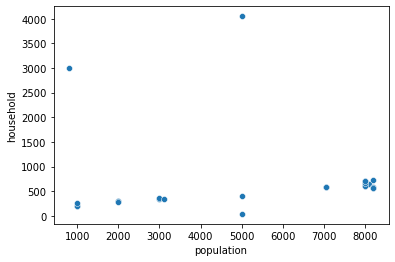

In [8]:
sns.scatterplot(data = framed, x='population',y='household')
plt.show()

We can see two extreme data points from the scatter plot, one with a population of less that 1000 and more than 3000 household which shows an average of more than 3 households per person, then the second of around 5000 population with over 4000 household, this too shows an average of about 1 person per household.

### Ways to Fix Outliers problems
- Delete Outliers : This can be done by droping the instance through rows, reason it is considered a not so good method since it might lead to loss of important information while been dropped(Usually applied to Outliers due to erros).
- Keep : Outliers can be kept as they are most especially Interesting Outliers with important information about the feature.
- Winsorizing (Capping) : In this method, we replace extreme values with a fixed value, a common practice is 5th percentile for the lower cap and 95 percentile for upper cap

- Log transformation : This reduces scale of the data, thereby reducing the distance of extreme values from the rest of the instances.

- Imputation : Here, we drop outliers and replace it with determined values, common pracetices are the use of Mean or Median value of the distribution.

- Trace the data to the Source and correct the error, this is for Outliers due to errors.

These are some of the methods used in fixing outliers,
Log transformation, Winsorizing and Imputation will be treated in this class.

**NB** The most important thing is to understand your dataset so you know if the outliers are due to errors or not so as to know the best method to use to fix it.


#### Lets practice !

In [9]:
## Log transformation
def log_transformed(data, x, y) : 
    data[y] = np.log(data[x]) + 1
    return data[y]

In [10]:
framed_data['feature_log'] = log_transformed(framed_data, x='feature', y = 'feature_log')

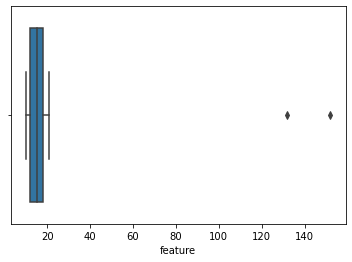

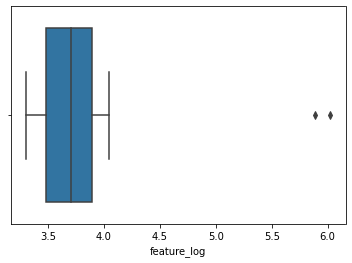

In [11]:
for _ in framed_data.columns :
    sns.boxplot(data = framed_data, x = _)
    plt.show()

We can See from the plot that the distribution range reduced, though it still kept the shape, so It is a good practice for
Interesting Outliers, Athough It doesn't work in some scenerio.

In [12]:
def winsorizing (data, x, y, lower, upper):
    per_10th = data[x].quantile(lower)
    per_90th = data[x].quantile(upper)
    data[y] = np.where(data[x] < per_10th, per_10th, data[x] )
    data[y]= np.where(data[x] > per_90th, per_90th, data[x])
    return data[y]

In [13]:
framed_data['feature_cap'] = winsorizing(framed_data, 'feature', 'feature_cap', 0.10, 0.90)

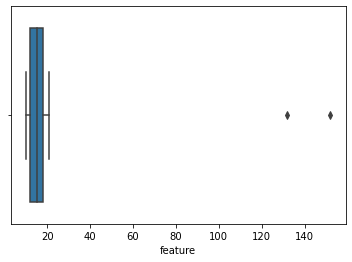

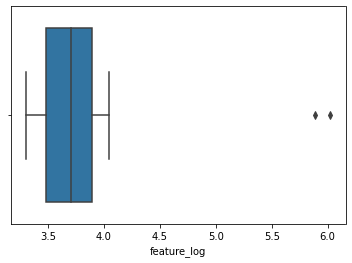

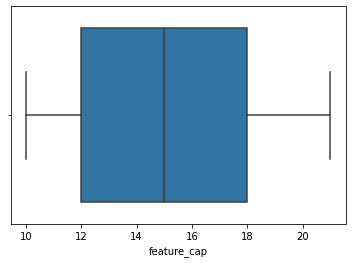

In [14]:

for _ in framed_data.columns :
    sns.boxplot(data = framed_data, x = _)
    plt.show()

We can see the distribution of feature_cap, It fixed the outliers though some datapoints are replaced, It doesn't lose additional information and works well with real world data that usually is not normally distributed.

In [15]:
def Imputation (data, x, y, metrics, lim = 3) :
    Q1 = data[x].quantile(0.25)
    Q3 = data[x].quantile(0.75)
    IQR = Q1 - Q3
    data[y] = np.where(data[x] < Q1 - lim * IQR, metrics, data[x])
    data[y] = np.where(data[x] > Q3 - lim * IQR, metrics, data[x] )
    return data[y]

In [43]:
framed_data['feature_imp'] = Imputation(framed_data, 'feature', 'feature_imp', np.mean(framed_data['feature']))

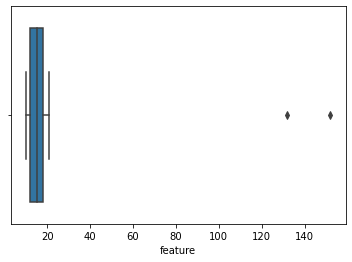

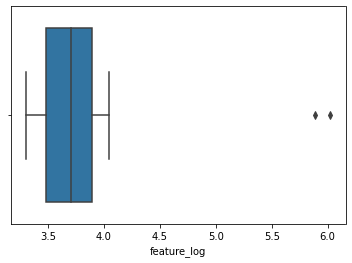

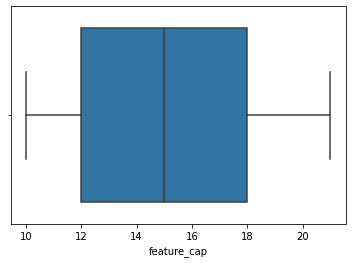

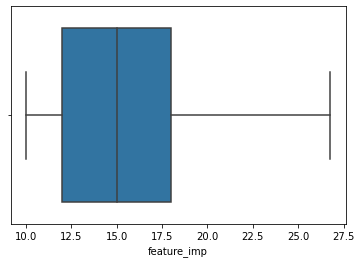

In [44]:

for _ in framed_data.columns :
    sns.boxplot(data = framed_data, x = _)
    plt.show()

We can see that this is similar to winsorizing, just that we are imputing another value entirely but not capping, Then other outliers do affect the value used in replacing it though median is less affected.

In [18]:
framed_data.describe()

,feature,feature_log,feature_cap,feature_imp
count,21.000000,21.000000,21.000000,21.000000
mean,26.761905,3.879738,15.238095,14.666667
std,38.561515,0.718537,3.590331,3.038640
min,10.000000,3.302585,10.000000,10.000000
25%,12.000000,3.484907,12.000000,12.000000
50%,15.000000,3.708050,15.000000,15.000000
75%,18.000000,3.890372,18.000000,16.000000
max,152.000000,6.023881,21.000000,21.000000


We can analyse this and compare the mean and the median to check how drawn closer they are.

### Lets practice using an external data

In [19]:
## Lets import the data.
df = pd.read_csv('Big Mart Sales Prediction Train.csv')

In [20]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [22]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [23]:
df['Outlet_Establishment_Year'] = df['Outlet_Establishment_Year'].astype('object')

In [24]:
def type_split(data, cont1, cont2):
    for _ in df.columns : 
        if df[_].dtype == 'object':
            cont1.append(_)
        else :
            cont2.append(_)
    return categorical, numerical
    

In [25]:
categorical = []
numerical = []
type_split(data= df, cont1= categorical, cont2 = numerical)

(['Item_Identifier',
  'Item_Fat_Content',
  'Item_Type',
  'Outlet_Identifier',
  'Outlet_Establishment_Year',
  'Outlet_Size',
  'Outlet_Location_Type',
  'Outlet_Type'],
 ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'])

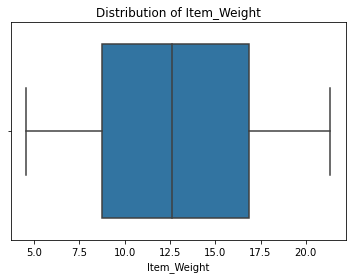

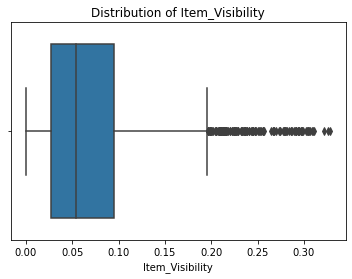

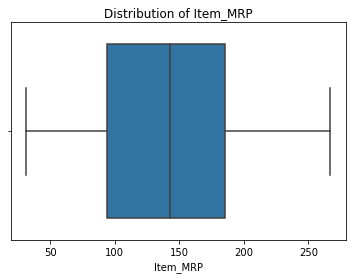

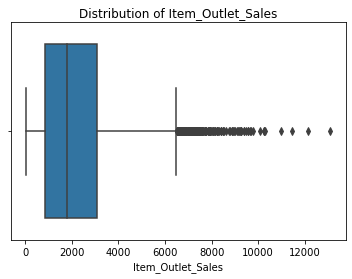

In [26]:
for col in numerical :
    sns.boxplot(data = df, x= col)
    plt.title(f'Distribution of {col}')
    plt.show()

We can deduce from the boxplots that **Item_Visibility** and **Item_Outlet_Sales**, but We are only going to fix Item_Visibility since Item_Outlet_Sales is a **Target Variable** and It should be **left alone**.

In [27]:
df['Item_Visibility'].describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [28]:
def kdeplot(data, x) :
    for col in x :
        sns.kdeplot(data = data, x= col)
        plt.title(f'Distribution of {col}')
        plt.show()

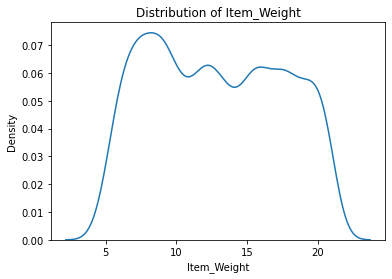

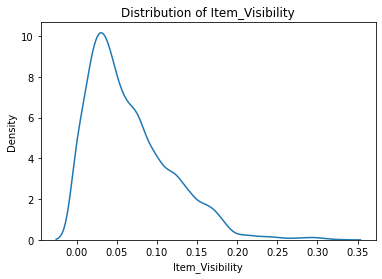

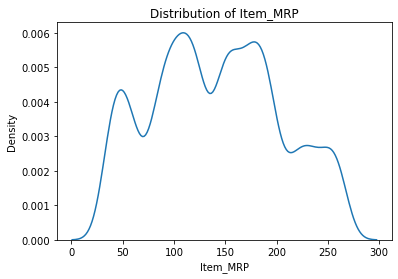

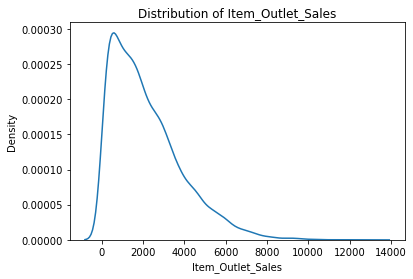

In [29]:
kdeplot(df, numerical)

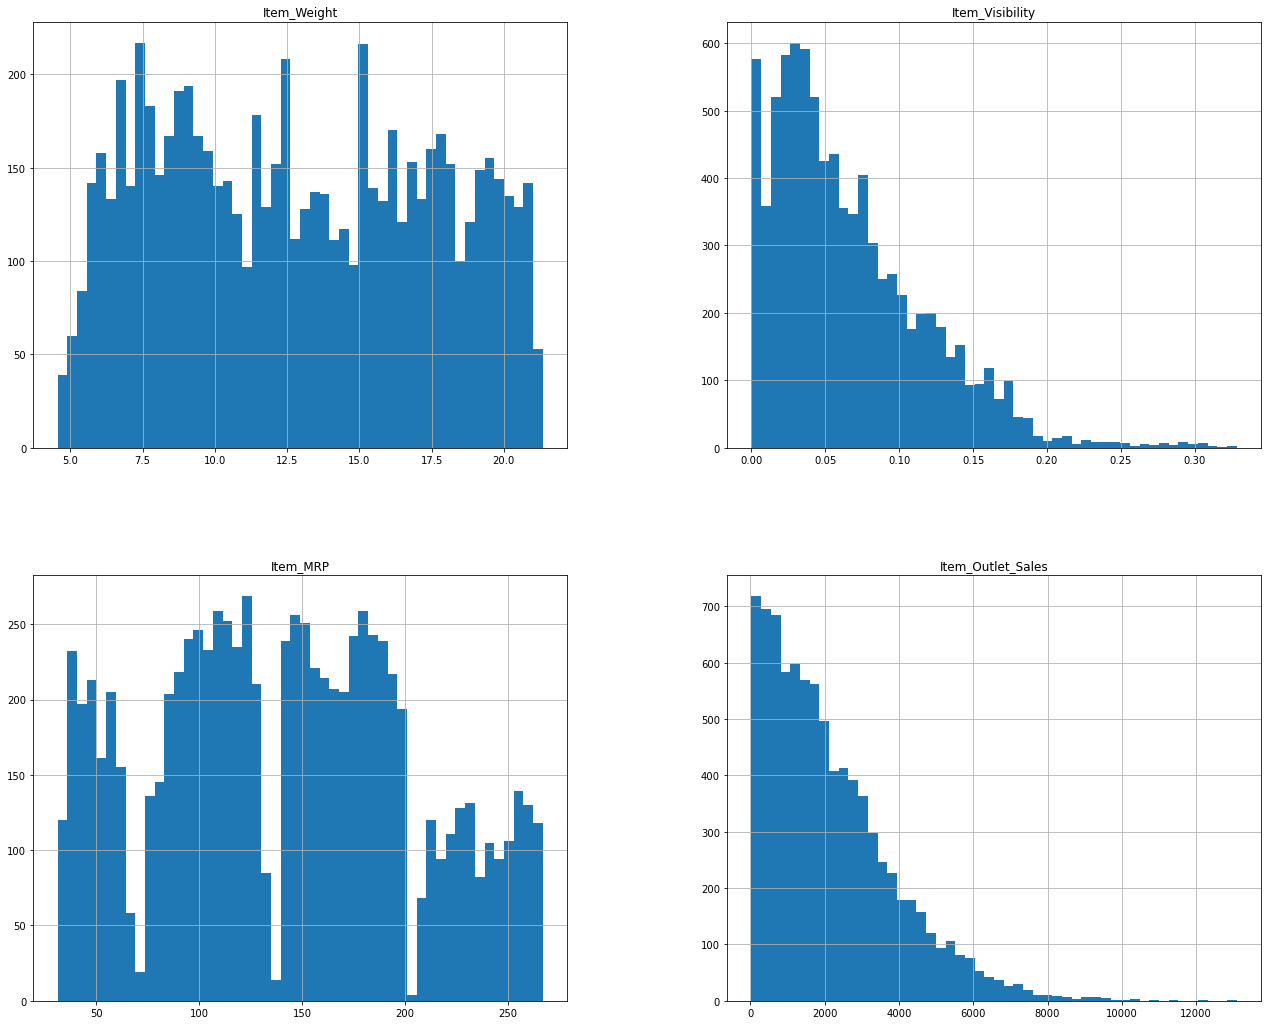

In [30]:
%matplotlib inline
df.hist(bins = 50, figsize = (22, 18))
plt.show()

You can see for both Kdeplot and Histplot the distribution of Item_Visibility shows Outliers from how skewed it looks.

In [31]:
Tukeys(df,'Item_Visibility')

('Inner fence : [49, 83, 108, 174, 334, 434, 502, 521, 532, 680, 847, 854, 966, 1159, 1225, 1272, 1291, 1311, 1324, 1434, 1496, 1501, 1560, 1575, 1644, 1651, 1754, 1805, 1827, 1841, 1941, 2081, 2088, 2122, 2177, 2251, 2324, 2336, 2401, 2403, 2439, 2445, 2586, 2613, 2728, 2855, 2895, 3001, 3017, 3171, 3206, 3336, 3341, 3399, 3458, 3474, 3488, 3497, 3540, 3750, 3767, 3811, 3884, 3993, 4006, 4175, 4192, 4219, 4350, 4382, 4408, 4530, 4538, 4567, 4656, 4674, 4789, 4941, 4987, 5031, 5050, 5057, 5083, 5150, 5154, 5287, 5354, 5366, 5374, 5445, 5634, 5732, 5734, 5784, 5795, 5837, 5880, 5891, 5946, 6008, 6012, 6102, 6179, 6536, 6547, 6576, 6622, 6647, 6670, 6674, 6786, 6833, 6903, 6909, 6926, 6953, 6966, 7005, 7030, 7072, 7081, 7088, 7107, 7121, 7215, 7250, 7278, 7368, 7388, 7499, 7558, 7603, 7639, 7744, 7866, 7949, 8194, 8215, 8273, 8292, 8345, 8371, 8432, 8509]',
 'outer fence : [521, 854, 1805, 2251, 2855, 3474, 3540, 3750, 4382, 5150, 5732, 6622, 7250, 7603, 8194]')

We can see indexes of **Inner fences** and **Outer fences**

### Lets fix it

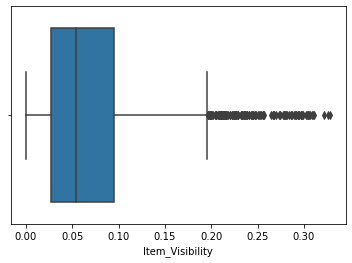

In [32]:
sns.boxplot(data = df,x='Item_Visibility')
plt.show()

In [33]:
df['Item_Visibility_log'] = log_transformed(df,'Item_Visibility','Item_Visibility_log')

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


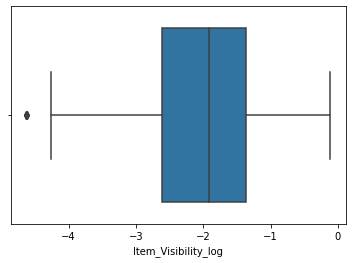

In [34]:
sns.boxplot(data = df,x='Item_Visibility_log')
plt.show()

In [35]:
df['Item_Visibility_cap'] = winsorizing(df, 'Item_Visibility', 'Item_Visibility_cap', 0.05, 0.95)

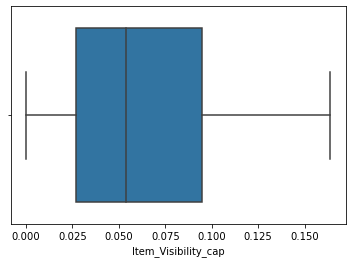

In [36]:
sns.boxplot(data = df,x='Item_Visibility_cap')
plt.show()

In [37]:
##Lets make it cover only the probable outliers, It is set to that by default
df['Item_Visibility_prob'] = Imputation(df, 'Item_Visibility', 'Item_Visibility_imp', np.median(df['Item_Visibility']))

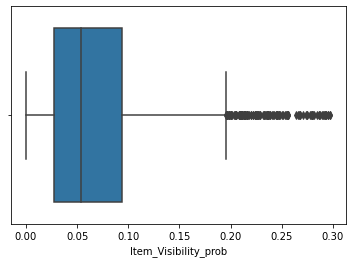

In [38]:
sns.boxplot(data = df,x='Item_Visibility_prob')
plt.show()

In [39]:
##Lets make it cover the possible outliers too
df['Item_Visibility_poss'] = Imputation(df, 'Item_Visibility', 'Item_Visibility_imp', np.median(df['Item_Visibility']),1.5)

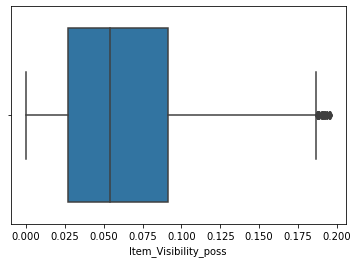

In [40]:

sns.boxplot(data = df,x='Item_Visibility_poss')
plt.show()

In [41]:
new_df = df[['Item_Visibility','Item_Visibility_log','Item_Visibility_cap','Item_Visibility_prob','Item_Visibility_poss']]

In [42]:
new_df.describe()

,Item_Visibility,Item_Visibility_log,Item_Visibility_cap,Item_Visibility_prob,Item_Visibility_poss
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.066132,-inf,0.064353,0.065684,0.062907
std,0.051598,NaN,0.046606,0.050586,0.045753
min,0.000000,-inf,0.000000,0.000000,0.000000
25%,0.026989,-2.612308,0.026989,0.026989,0.026989
50%,0.053931,-1.920051,0.053931,0.053931,0.053931
75%,0.094585,-1.358253,0.094585,0.094256,0.091097
max,0.328391,-0.113550,0.163780,0.297313,0.195721


You Can see the the difference after using various techniques to fix the outliers. One can see that using log is off the list , then depending on ones understanding of the data, we can pick the one that worked best from the remaining.

### There are other ways to detect and fix outliers not treated here.